# Classification of Direct Marketing Campaign Subscriptions: A Logistic Regression & Random Forest Approach

#### Author: Georgios Spyrou (<a href="https://github.com/gpsyrou" style="text-decoration: none">github</a>)


## Sections

- <a href='#Introduction' style="text-decoration: none">Introduction </a>
- <a href='#initial' style="text-decoration: none">Data Import, Cleaning and Exploratory Data Analysis (EDA) </a> 
  - <a href='#import_data' style="text-decoration: none">Set up project folder and load data</a>
  - <a href='#data_cleaning' style="text-decoration: none">Data cleaning</a>
  - <a href='#eda' style="text-decoration: none">Exploratory Data Analysis</a>
- <a href='#data_preprocessing' style="text-decoration: none">Data Preprocessing</a>
    - <a href='#transformations' style="text-decoration: none">Transformations</a>
    - <a href='#dummyvariables' style="text-decoration: none">Dummy Variables/One-hot Encoding</a>
    - <a href='#scaling' style="text-decoration: none">Scaling</a>
    - <a href='#traintestsplit' style="text-decoration: none">Split dataset to Train & Test sets</a>
- <a href='#smote' style="text-decoration: none">Synthetic Minority Oversampling Technique (SMOTE) & Random Undersampling</a>   
- <a href='#model_evaluation_metrics' style="text-decoration: none">Evaluation Metrics</a> 
  - <a href='#recall_precision' style="text-decoration: none">Precision and Recall</a>
  - <a href='#roc' style="text-decoration: none">Receiver Operating Characteristics (ROC) analysis</a>
- <a href='#classification_models' style="text-decoration: none">Classification Models</a> 
    - <a href='#random_forest' style="text-decoration: none">Random Forest</a>
        - <a href='#feature_importance' style="text-decoration: none">Feature Importance</a>
    - <a href='#logistic_regression' style="text-decoration: none">Logistic Regression</a>
- <a href='#model_comparison' style="text-decoration: none">Model Comparison and Final Thoughts</a> 

<a id='Introduction'></a>

## Project Description

Purpose of this project is to analyze a dataset containing information about marketing campaigns that were conducted via phone calls from a Portuguese banking institution to their clients. The main goal of these campaigns was to prompt their clients to subscribe for a specific financial product of the bank (term deposit). After each call was conducted, the client had to inform the institution about their intention of either subscribing to the product (indicating a successful campaign) or not (unsucessful campaign).



Our main task in this project is to create effective machine learning algorithms that are able to predict the probability of a client subscribing to the bank's product. We should note that, even though we are talking about calculating probabilites, we will create classification algorithms - meaning that the final output of our models will be a binary result indicating if the client subscribed ('yes') to the product or not ('no').



The dataset has 41188 rows (instances of calls to clients) and 21 columns (variables) which are describing certain aspects of the call. Please note that there are cases where the same client was contacted multiple times - something that practically doesn't affect our analysis as each call will be considered independent from each other, even if the client is the same. 

### Description of the features



The predictor variables (features) contained in the dataset can be divided into the following five sections:



1. Variables that describing attributes related directly to the client:



    a. **_age_** <br>

    b. **_job_**: type of job (e.g. 'admin', 'technician', 'unemployed', etc) <br>

    c. **_marital_**: marital status ('married', 'single', 'divorced', 'unknown') <br>

    d. **_education_**: level of education ('basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown','university.degree','illiterate') <br>

    e. **_default_**: if the client has credit in default ('no', 'unknown', 'yes') <br>

    f. **_housing_**: if the client has housing a loan ('no', 'unknown', 'yes')<br>

    g. **_loan_**: if the client has a personal loan ? ('no', 'unknown', 'yes')<br>

    <br>

2. Variables related to the last contact of the current campaign:



    a. **_contact_**: type of communication ('telephone', 'cellular') <br>

    b. **_month_**: month of last contact <br>

    c. **<em>day\_of\_week</em>**: day of last contact <br>

    d. **_duration_**: call duration (in seconds) <br>

    <br>

3. Other variables related to the campaign(s):



    a. **_campaign_**: number of contacts performed during this campaign and for this client <br>

    b. **_pdays_**: number of days passed by after the client was last contacted from a previous campaign <br>

    c. **_previous_**: number of contacts performed before this campaign and for this client <br>

    d. **_poutcome_**: outcome of previous marketing campaign ('nonexistent', 'failure', 'success') <br>

    <br>   

4. Socioeconomic variables:



    a. **_emp.var.rate_**: employement variation rate - quarterly indicator <br>

    b. **_cons.price.idx_**: consumer price index - monthly indicator <br>

    c. **_cons.conf.idx_**: consumer confidence index - monthly indicator <br>

    d. **_euribor3m_**: euribor 3 month rate - daily indicator <br>

    e. **_nr.employed_**: number of employees - quarterly indicator <br>

      

Of course, the dataset also containts the variable **_subscribed_** which is the target variable of the project, indicating if the client subscribed to the product (_'yes'_) or not (_'no'_).



Now that we got a brief understanding of what the project is about, what variables the dataset contains and what is the primary goal, we can start with the main part of our analysis. At the first part of this project we will perform all the regular operations needed in pretty much any data science project: load the dataset into a dataframe, search for corrupt/inaccurate records & perform data cleaning operations, and finally perform exploratoty data analysis to identify interesting patterns in the data that might be useful when creating the machine learning algorithms.

<a id='initial'></a>

## Part 1 - Data Import, Cleaning and Exploratory Data Analysis (EDA)

<a id='import_data'></a>

First step is to import the relevant libraries that we will use across the whole project, set the project directory where all files are located and load the main dataset into a dataframe.

In [3]:
import os
import numpy as np
import pandas as pd
from typing import List

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (confusion_matrix,
                             roc_curve,
                             roc_auc_score)
sns.set_style("dark")

Project set-up and data loading:

In [4]:
# Location of the project folder and the dataset (csv file)

data_file_loc = '/kaggle/input/direct-marketing-campaigns-bank-marketing/bank_marketing_campaigns_full.csv'
print(data_file_loc)

/kaggle/input/direct-marketing-campaigns-bank-marketing/bank_marketing_campaigns_full.csv


In [5]:
bank_marketing_df = pd.read_csv(data_file_loc, sep=';', header=[0])

In [6]:
bank_marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We can observe that the last column of the dataset ('y') is the target variable which indicates if a client ended up subscribing to the product or not. The initial naming of this column that it's coming from the dataset is not very self-explanatory, so we will rename it to something more relevant.

In [7]:
bank_marketing_df.rename(columns={'y': 'subscribed'}, inplace=True)

Finally we can see the specific datatype of each column in the dataset:

In [8]:
def getDatatypeSummaryForDataframe(input_df: pd.DataFrame, return_df=True) -> None:
    df_col_datatypes = pd.DataFrame(input_df.dtypes).reset_index()
    df_col_datatypes.columns = ['Column_Name', 'Datatype']    
    print(df_col_datatypes.groupby('Datatype').count())

    if return_df:
        return df_col_datatypes

In [9]:
getDatatypeSummaryForDataframe(bank_marketing_df)

          Column_Name
Datatype             
int64               5
float64             5
object             11


,Column_Name,Datatype
0,age,int64
1,job,object
2,marital,object
3,education,object
4,default,object
5,housing,object
6,loan,object
7,contact,object
8,month,object
9,day_of_week,object


<a id='data_cleaning'></a>

#### Data Cleaning

In every data science project (and in general when working with data) before we perform any type of data analysis or create prediction models it's very important that we make sure that the dataset is as clean as possible. When calling a dataset clean, we generally mean that we have handled any cases where we had missing values (the might come in the form of NULL if the value is missing or with other types like 'unknown'), get rid of duplicate rows as they do not add any value and they just increase the dimension of the data, check for mispelled words (if working with text we usually), and many more.


In general, the data cleaning steps are very important for every project, as we want to make sure that the dataset has the best possible shape before we build any model around it. That said, there is no specific steps that we need to take for data cleaning and it's something that the data analyst/scientist should adjust depending on the dataset that they are working with, and the specific problem that they are trying to tackle.

In [10]:
def checkNumberOfDuplicateRows(input_df: pd.DataFrame, msg=False) -> int:
    num_dups = bank_marketing_df.duplicated().sum()
    if msg:
        print('There are {0} rows in the dataset that are duplicated'.format(num_dups))
    return num_dups

In [11]:
# Check for duplicates
checkNumberOfDuplicateRows(bank_marketing_df, msg=True)

There are 12 rows in the dataset that are duplicated


12

In [12]:
bank_marketing_df = bank_marketing_df.drop_duplicates()

checkNumberOfDuplicateRows(bank_marketing_df, msg=False)

0

Above we can see that we have removed 12 rows from the initial dataset as they were duplicates of other rows and they did not give us any additinal information that we didn't have already.

In [13]:
def checkMissingValues(input_df: pd.DataFrame) -> pd.DataFrame:

    ''' Given a DataFrame, create a column-wise summary of the number of
    missing values.
    '''
    missing_v_df = pd.DataFrame(input_df.isnull().sum(axis=0), columns=['Num_Missing_Values']).reset_index()
    missing_v_df.columns = ['Column_Name', 'Num_Missing_Values']
    missing_v_df = missing_v_df[missing_v_df['Num_Missing_Values'] != 0]

    if len(missing_v_df) > 0:
        return missing_v_df
    else:
        return 'No missing values in the data'

In [14]:
checkMissingValues(bank_marketing_df)

'No missing values in the data'

The check for missing values indicates that all of the rows/columns are fully populated (i.e. no NULL values). That said, this does not mean that we don't have any missing values in another format. For example - as we are going to see below - there are many cases where for specific columns there are instances taking the value 'unknown', indicating that we do not know the value. Such cases are technically missing values in the form of a string.

In [15]:
# There are many missing values in other forms like 'unknown'
unknown_cols = bank_marketing_df.isin(['unknown']).sum(axis=0)

unknown_cols[unknown_cols > 0]

job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

For the time being, we will leave these columns as they are and we won't proceed with imputation methods in order to infer what the values would be. This is something that we might want to do in future iterations of the project, by using cross-tabulation methods to 'guess' what the unknown value would be based on the columns that are populated.

<a id='eda'></a>

#### Exploratory Data Analysis

At first we can have a look at the distribution of the target variable (_'subscribed'_) across the whole dataset, to identify any interesting patterns.

In [16]:
def visualizeCategoricalFeature(input_df: pd.DataFrame,
                                col_name: str,
                                hue=None,
                                return_counts=False,
                                figsize=(10, 8),
                                rotation=80):
    ''' Plot the number of observations per category for a specified feature defined by 'col'.
    Parameters
    ----------
        input_df: Dataframe that contains the dataset
        col: Column of the dataframe that will be used by the countplot
        
    Returns
    -------
        Countplot of the specified variable.
    '''

    size = float(input_df.shape[0])

    if return_counts:
        print(input_df[col_name].value_counts())
    plt.figure(figsize=figsize)

    if hue:
        ax = sns.countplot(x=col_name, hue=hue, data=input_df, palette=["#d63638", "#3582c4"])
    else:
        ax = sns.countplot(x=col_name, data=input_df, palette=["#d63638", "#3582c4"])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+5, '{:1.2f}%'.format(105 * height/size), ha='center', fontweight='bold')

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)   
    plt.grid(True, alpha=0.2, color='black')
    plt.title(f'Number of observations per \'{col_name}\'', fontweight='bold')
    plt.show()

subscribed
no     36537
yes     4639
Name: count, dtype: int64


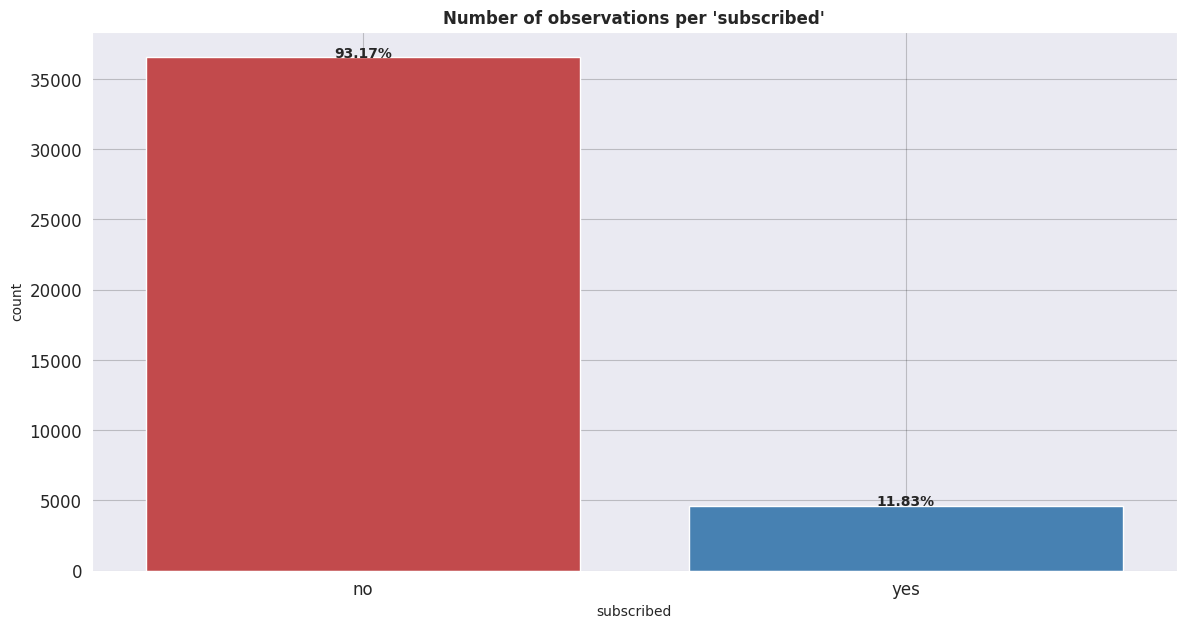

In [17]:
visualizeCategoricalFeature(
    input_df=bank_marketing_df, 
    col_name='subscribed',
    hue=None, 
    return_counts=True, 
    figsize=(14, 7), 
    rotation=0
)

We can observe that the dataset is **highly imbalanced** towards the clients who did not subscribe for the product, as for approximately 89% of the clients the product campaign was not successful. Class imbalance is an important attribute of our dataset and we have to be careful both in the way that we are going to develop our prediction models, as well as the evaluation metrics that we will pick to measure how accurate the classifiers are. For example in our case (and in any case where we have class imbalance) we could not pick accuracy as a performance metric because the results would be misleading - but more on the evaluation metrics later in the project.



Now back to the EDA analysis, we will initially focus on the **categorical** variables (i.e. variables that can take limited/fixed number of possible values and they usually represent groups/labels). Please note that we will present only the categorical variables that appeared to give us significant or interesting results - the rest have been omitted from this notebook.

##### _job_

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


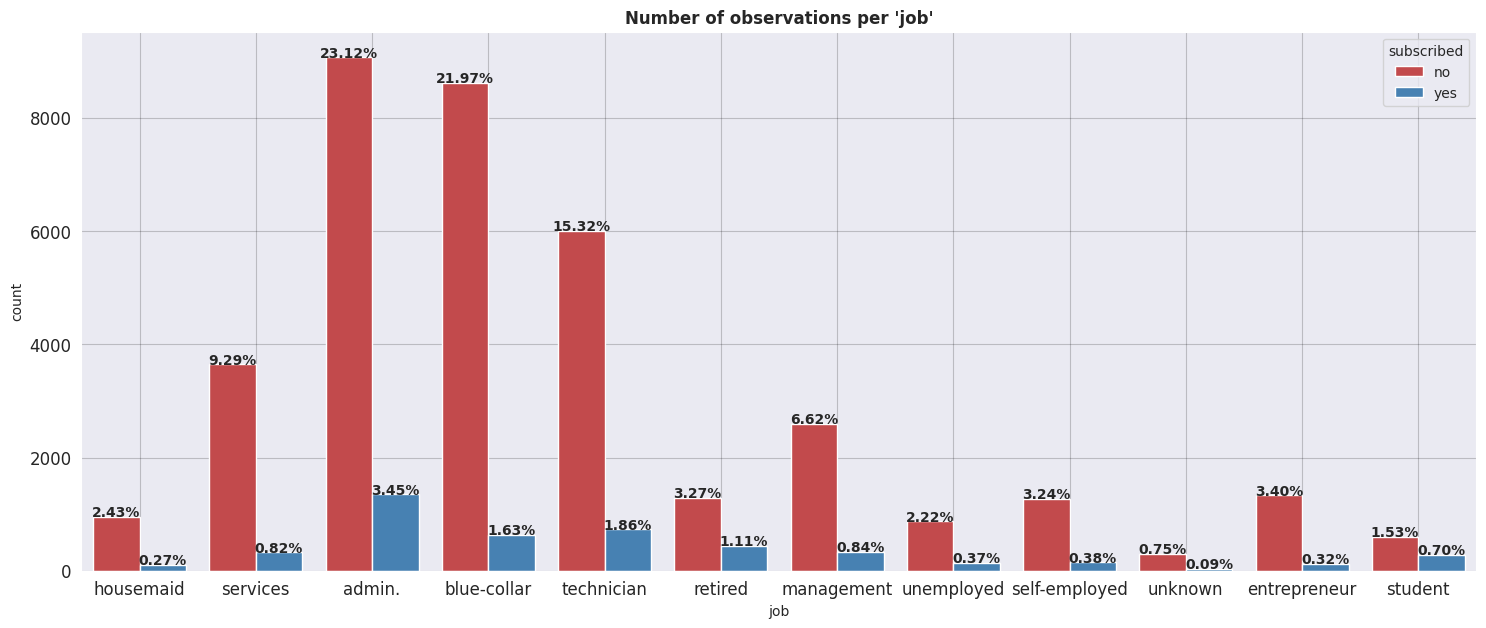

In [18]:
visualizeCategoricalFeature(
    input_df=bank_marketing_df, 
    col_name='job', 
    hue='subscribed',
    return_counts=True, 
    figsize=(18, 7), 
    rotation=0
)

_Job_ appears to be a good predictor for the machine learning algorithms to identify who subscribed for the product. For example, we can observe that the admin, technician and blue-collar jobs appear to be the ones that tend to subscribe more compared to the rest of the professions. Another interesting finding is that almost 1 out of 3 clients who are being contacted are students, and a good percentage of them actually ends up subscribing to the bank's product.

##### _education_

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


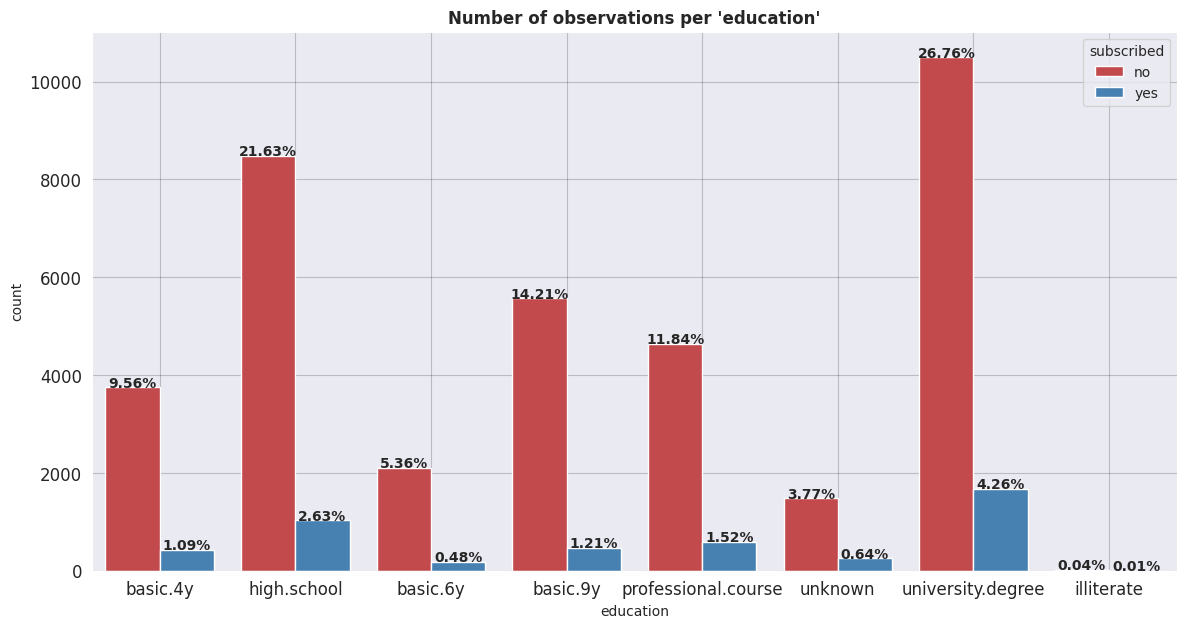

In [19]:
visualizeCategoricalFeature(
    input_df=bank_marketing_df, 
    col_name='education',
    hue='subscribed',
    return_counts=True, 
    figsize=(14, 7), 
    rotation=0
)



People with higher education (university degree) or high school diploma appear to be more prompt to subscriptions. This can be likely because a university degree and higher education might lead to jobs with higher salaries and thus people are more prompt to invest money to non-essential products and services, like the one the bank was offering.

##### _poutcome_

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64


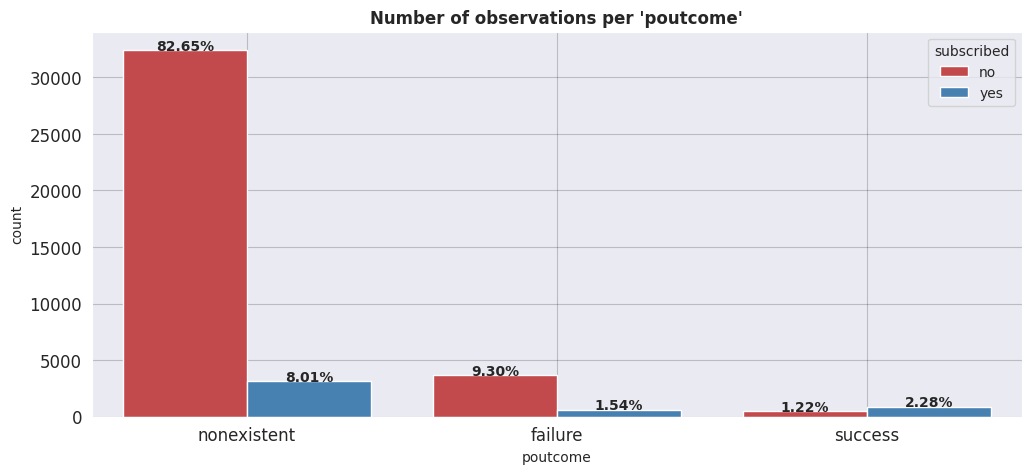

In [20]:
visualizeCategoricalFeature(
    input_df=bank_marketing_df, 
    col_name='poutcome', 
    hue='subscribed',
    return_counts=True, 
    figsize=(12, 5), 
    rotation=0
)

For most of the customers in the dataset, it's the first time that they are being contacted. Interesting is that customers who subscribed during the previous campaign, they tend to re-subscribe. Thefefore this variable might be a strong predictor for the target variable.



<br>

Below we will focus at performing exploratory data analysis for the **numerical** variables (i.e. variables that are representing quantities/numbers).



We can start by looking at a quick summary of the main statistics for each variable:

In [21]:
summary_num_vars = bank_marketing_df.describe()
summary_num_vars

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Some observations from the summary table for the numerical variables:



- **$age$**: The target group of the campaings appears to be the people with age range between 30-50 years old - most likely indicating that the bank was targeting people that have finished their studies and are now actively working

- **$pdays$**: The majority of the data has the value ‘999’, indicating that most of the clients were not previously contacted from another campaign

- **$duration$**: The majority of the calls last between 1 and 5 minutes. Interesting is that the calls that belong to the last quartile lasted significantly longer than the average




In [22]:
def visualizeNumericalVar(input_df: pd.DataFrame,
                          col_name: str,
                          hue: str,
                          figsize=(10, 8)) -> None:

    ''' Generate a Boxplot and a Histogram for a numerical variable.
    Input:

    ----
        input_df: Dataframe that contains the dataset
        col: Column of the dataframe that will be used by the boxplot/histogram
        hue: Column for which to split the dataset in terms of color

    Returns:
    ------
        Boxplot and overlapping histograms of the specified variable, splitted by the different classes in 'hue'
    '''

    box_palette_cols = {"no": "firebrick", "yes": "darkcyan"}

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    # Boxplot
    sns.boxplot(
        data=input_df,
        x=hue, 
        y=col_name, 
        palette=box_palette_cols,
        ax=ax[0]).set(title=f'Boxplot of \'{col_name}\'')

    # First Histogram

    sns.distplot(input_df[input_df[hue] == 'no'][col_name], color='darkcyan',
                 fit=norm, fit_kws={'color': 'darkcyan'},  kde=False,
                 ax=ax[1]).set(title=f'Histogram of \'{col_name}\'')

    # Second Histogram

    sns.distplot(input_df[input_df[hue] == 'yes'][col_name], color='firebrick',
                 fit=norm, fit_kws={'color': 'firebrick'}, kde=False,
                 ax=ax[1]).set(title=f'Histogram of \'{col_name}\'')

    ax[0].grid(True, alpha=0.1, color='black')
    ax[1].grid(True, alpha=0.1, color='black')
    fig.show()

###### _age_

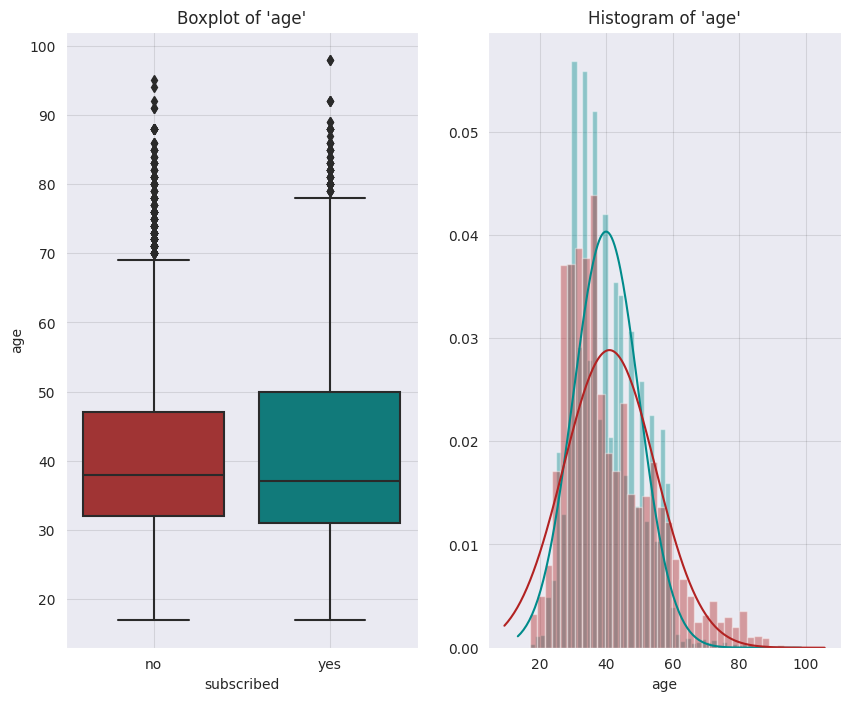

In [23]:
visualizeNumericalVar(input_df=bank_marketing_df, col_name='age', hue='subscribed', figsize=(14, 10))

From the plot above we can observe that:



- Median age is around 37-40 years old, and that is the case for both for clients who subscribed ('yes) and clients who didn't (no)

- We can quickly observe the presence of a few outliers - but in reality are just people who belong to a higher age group, and therefore are still relevant in our analysis

- There is a big overlap between subscribed/not subscribed clients when comparing the data for the interquartile range (i.e. data that fall between quartile Q1 and Q3)

- The first quartile(Q1) appears to be almost the same for both classes.On the other hand, the last quartile(Q4) is slightly broader in favor of customers who subscribed


#### Correlation

Now, it would be interesting to explore the case that some of the numerical variables in the dataset might be highly correlated - something that would imply that we have variables that do not provide much additional information as the required information is already been captured from another variable(s). As a reminder, _correlation_ is a statistical measure that indicates the extend to which two or more variables fluctuate together, and it a _normalized_ version of the covariance -  a statistic that indicates the tendency (sign) of a linear relationship between to variables but lacks in showing the magnitute of this relationship. 



Thus, we will calculate the correlation of the variables and present the results with a pairplot (pairwise relationship between variables) as well as a heatmap of the **Pearson Correlation Coefficients** (PCC). PCC is a statistic that measures the  linear correlation between two variables and it takes values from -1 (strong negative correlation) to +1 (strong positive correlation). If the PCC has value of 0, then this indicates that there is no correlation between the variables.The connection between covariance and the Pearson correlation coefficient is being describred in the following formula:



$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$



where ${cov} (X,Y)$ is the covariance between two variable $X$ and $Y$, and $\sigma _{X}$, $\sigma _{Y}$ are their standard deviations.

In [24]:
NumericTypes = [np.int64, np.float64, int, float, complex]

numeric_cols = list(bank_marketing_df.select_dtypes(include=NumericTypes).columns)

<Figure size 1800x1400 with 0 Axes>

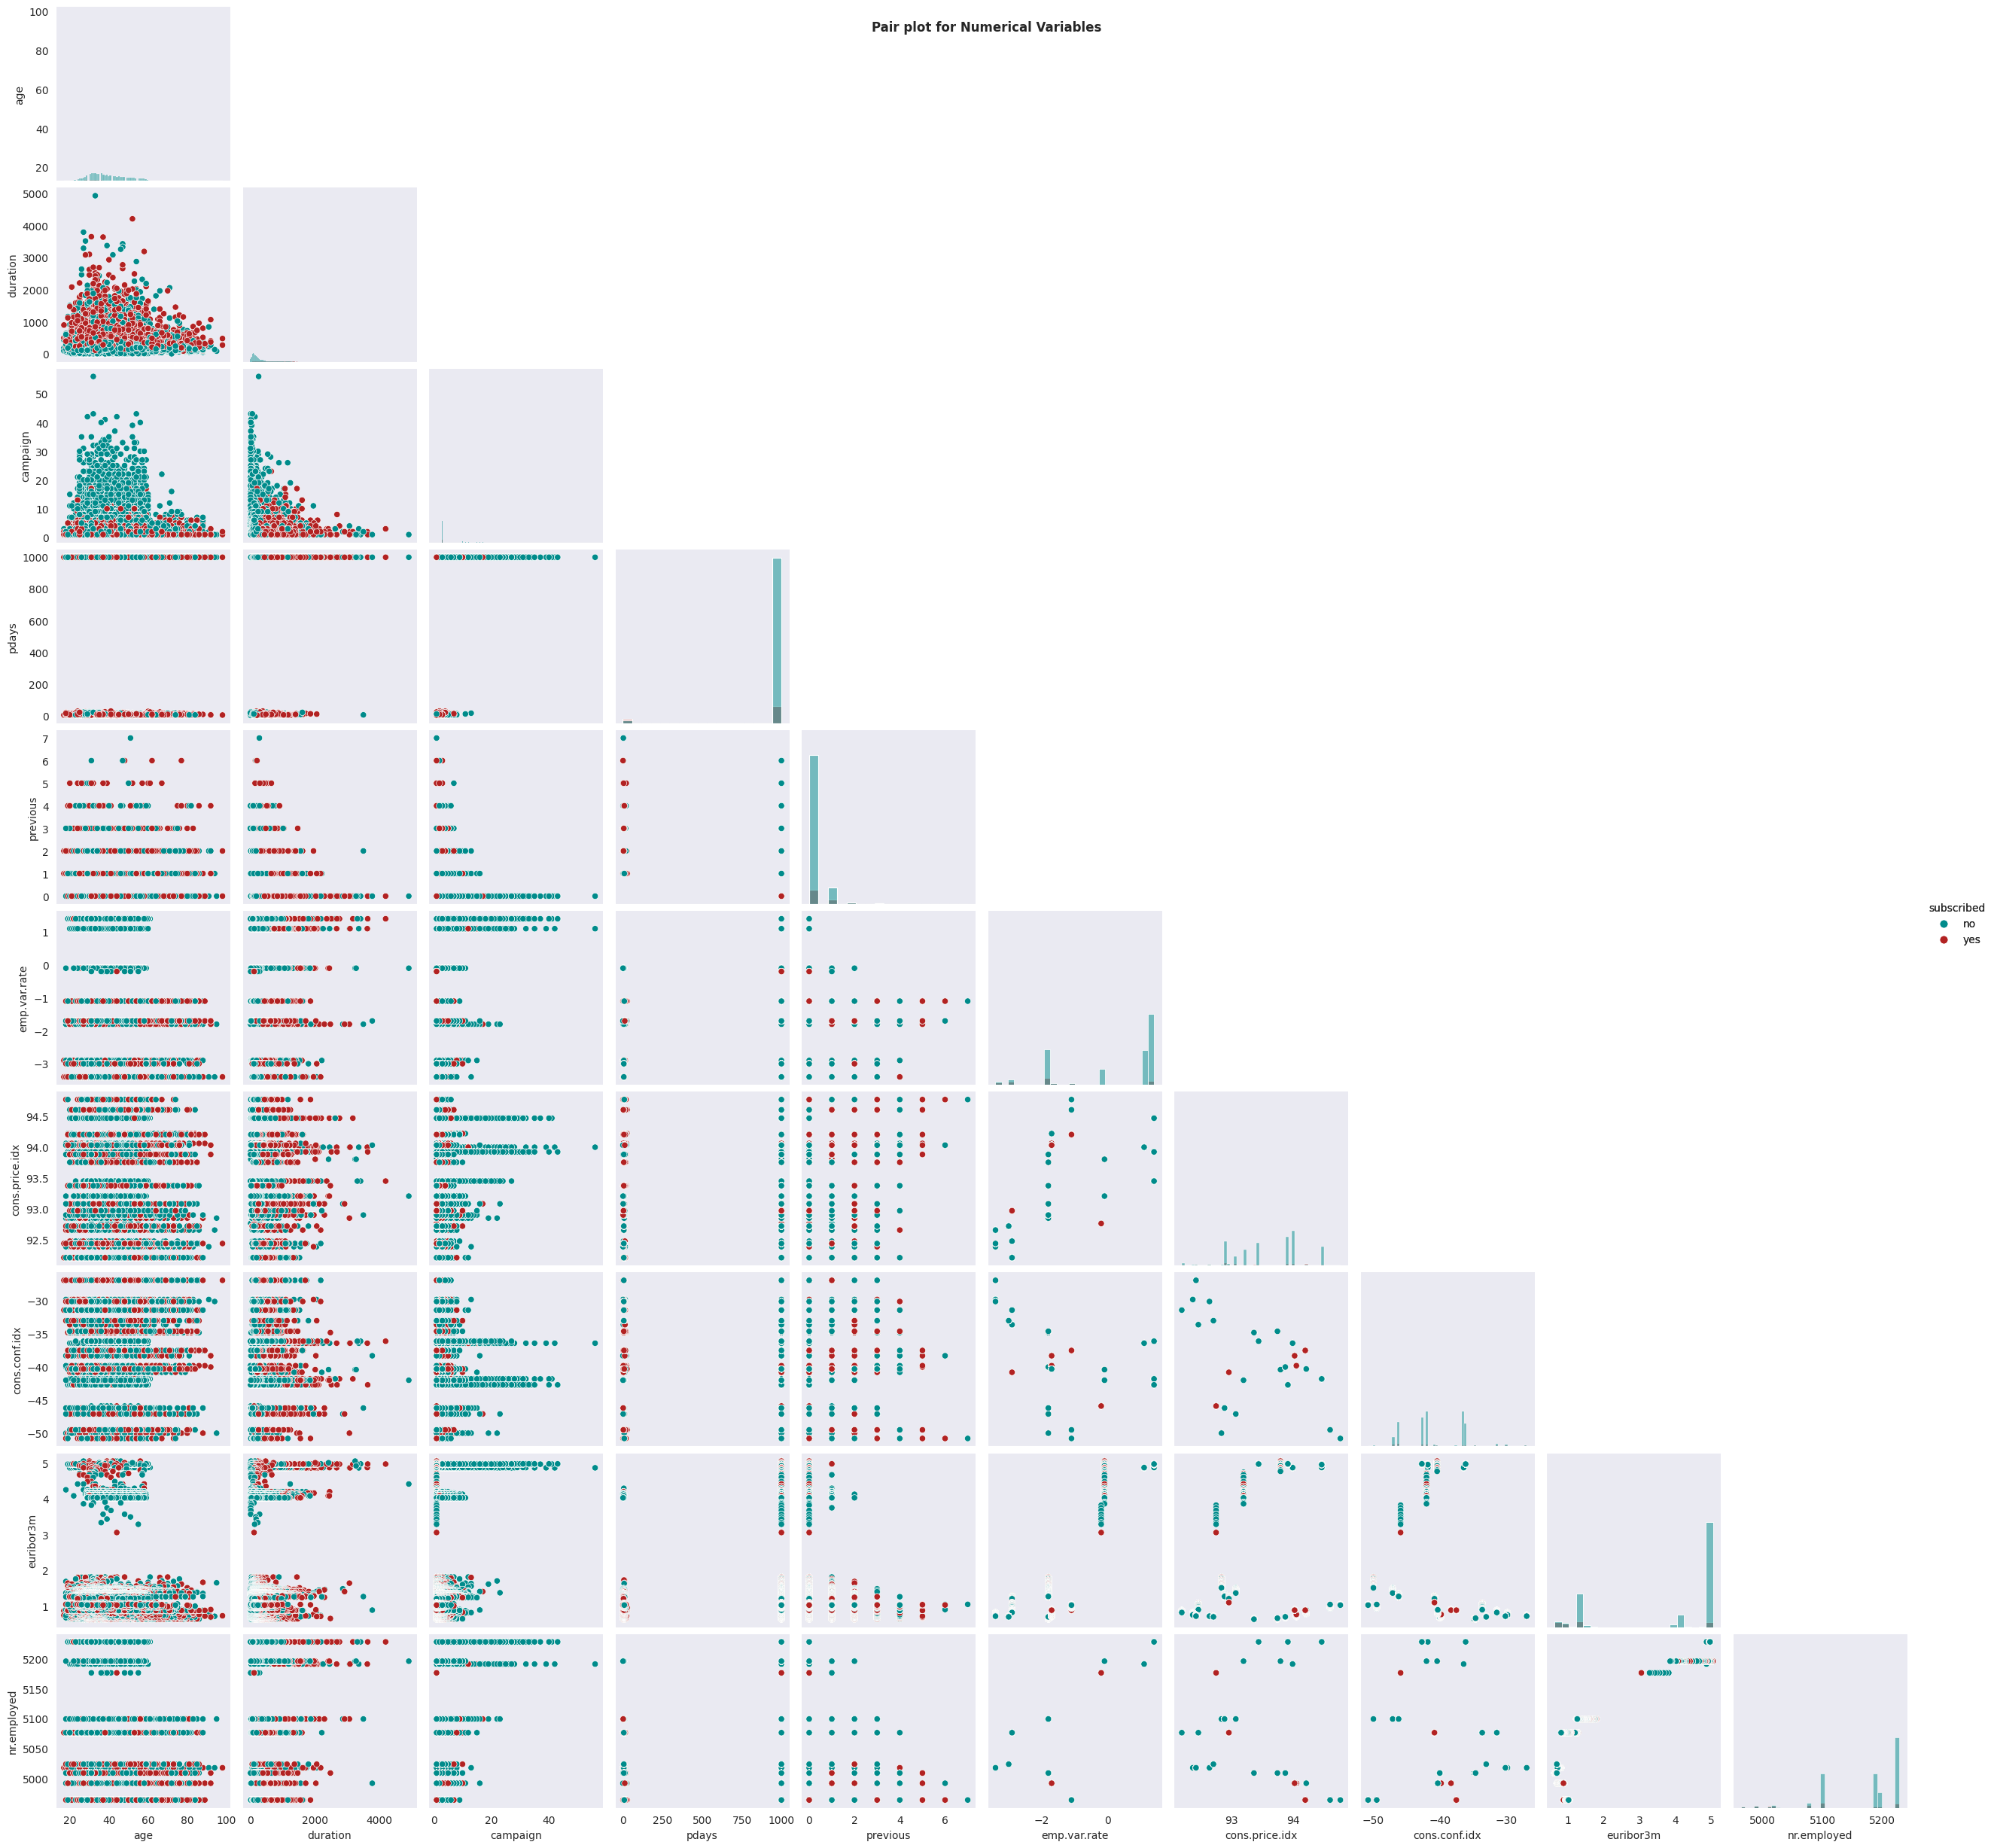

In [25]:
def hide_upper_triangle(*args, **kwds):
    plt.gca().set_visible(False)

# Pairplot
plt.figure(figsize=(18, 14))
pair_plt = sns.pairplot(data=bank_marketing_df, vars=numeric_cols,
                        hue='subscribed', diag_kind='hist',
                        palette={"no": "darkcyan", "yes": "firebrick"})

pair_plt.map_upper(hide_upper_triangle)
pair_plt.add_legend()
pair_plt.set(alpha=0.5)
pair_plt.fig.suptitle('Pair plot for Numerical Variables', fontweight="bold")
plt.show()

In [30]:
def computeCorrelation(input_df: pd.DataFrame,
                       num_vars: List[str],
                       plt_heatmap=False,
                       return_corr=True,
                       figsize=(12, 10)):

    # Calculate the Pearson Correlation Coefficients
    corr_coeffs = input_df[num_vars].corr().abs()

    # Heatmap
    mask = np.triu(np.ones_like(corr_coeffs, dtype=bool))
    f, ax = plt.subplots(figsize=(figsize))

    if plt_heatmap:
        sns.heatmap(corr_coeffs, mask=mask, cmap='Reds', vmax=1.0, center=0, annot=True,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.title('Pearson Correlation Coefficients for Numeric Variables', fontweight='bold')

    if return_corr:
        return corr_coeffs

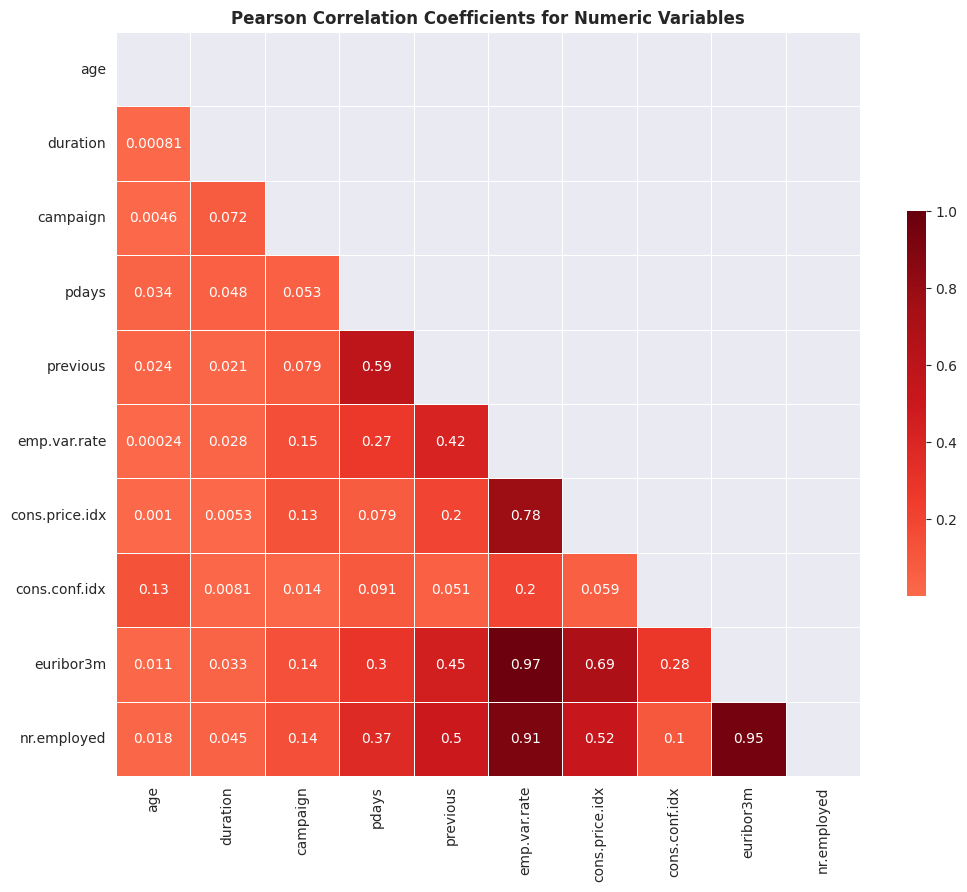

In [31]:
computeCorrelation(input_df=bank_marketing_df, num_vars=numeric_cols, plt_heatmap=True, return_corr=False)

The values in the Heatmap above represent the value of the Pearson Correlation Coefficients between each pair of variables. From the above we can infer that the pairs of variables in the socioeconomic group of features (i.e., emp.var.rate, cons.price.idx, euribor3m, nr.employed ) appear to be highly correlated with each other. On the other hand, the rest of the pairs do not indicate the presence of high correlation.

<a id='data_preprocessing'></a>

## Part 2 - Data Preprocessing

Now that we have finished the EDA part of the project - and before we move to the fun part (i.e. modelling) - we will need to make any necessary adjustments to the dataset, so that it will be in the right format before we fit it into the machine learning algorithms. Specifically, we are going to:



1. Transform the _pday_ column into separate buckets

2. Re-map the values of the target variable from 'yes' and 'no' to 1 and 0 respectively

3. Use one-hot encoding at the categorical variables (i.e. transform them to numerical variables or more accurately to binary variables)

4. Normalize the numerical variables using the Min-Max feature scaling method

5. Split the dataset into training and test samples

<a id="transformations"></a>

Therefore we can start with with point 1. As a reminder, earlier in the project we saw that the values of _pday_ tend to have the value '999'. Specifically out of the 41176 distinct cases, 39661 of them had this value which indicates that the client has not been contacted previously from another campaign. To tackle this issue, we will create new 'buckets' (i.e. groups) based on this variable, representing the amount of days that have passed since the client has been contacted from another campaign. The split is going to follow the logic below:



- **0**: Client never contacted before from another campaign

- **1**: Contacted during the previous week (0 to 7 days)

- **2**: Contacted between 8 and 14 days ago

- **3**: Contacted between 15 to 21 days ago

- **4**: Contacted more than 21 days ago

In [32]:
def bucketPday(pday_val):

    ''' Split the pday feature into 5 different buckets, depending on how many days
    (if any) have passed since they last contacted from a previous campaign.
    The bucket measures the number of weeks passed since the last contact.
    '''
    if pday_val == 999:
        return 0

    elif (pday_val >= 0) and (pday_val <= 7):
        return 1

    elif (pday_val >= 8) and (pday_val <= 14):
        return 2
    elif (pday_val >= 15) and (pday_val <= 21):
        return 3
    else:
        return 4

In [33]:
bank_marketing_df['pdays_bucket'] = bank_marketing_df['pdays'].apply(lambda x: bucketPday(x))

In [34]:
bank_marketing_df['pdays_bucket'].value_counts()

pdays_bucket
0    39661
1     1177
2      276
3       56
4        6
Name: count, dtype: int64

In [35]:
# Drop the column 'pdays' as we do not need it anymore
bank_marketing_df.drop(columns=['pdays'], inplace=True)

In the next step we map the values from the target variable from 'yes' and 'no' to 1 and 0, as follows:

In [36]:
bank_marketing_df['subscribed'] = bank_marketing_df['subscribed'].map({'yes': 1, 'no': 0})

<a id="dummyvariables"></a>

Next step of the pre-processing part is to **encode** the categorical features of the dataset. This is necessary as most of the algorithms do not work well with categorical (i.e. text) data, and we need a way to make the computer to understand the categories as represented by numbers - while also making sure that we are preserving the characteristics of these cetegorical features.



In this project we will use the **dummy-variables** method, as we can not map our values directly to integers because that would imply we are assuming that there is a natural ordering in the values/labels - something that's not the case. This method is creating a binary representation for the labels by transforming the labels into separate columns and assign to them the value 1 when the label represents the true category and 0 elsewhere.



The use of dummy variables works in the same way as one-hot encoding, with the only difference that the former creates $n-1$ number of variables, while the latter creates $n$ number of variables after transformation. Thus, we could say that the dummy variables method is like one-hot encoding while taking into consideration the dummy variable trap.



As a remainder, the dummy variable trap occurs when we create a new feature for _every_ unique category of a categorical variable, something that could lead to an issue of multicollinearity of a feature with the intercept (i.e. the feature and the intercept can describe each other perfectly). Hence, to solve this issue we tend to drop one of the categories generated for each variable.

In [37]:
categorical_cols = bank_marketing_df.select_dtypes(include=['object']).columns

categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [38]:
encoded_df = pd.concat([bank_marketing_df, pd.get_dummies(bank_marketing_df[categorical_cols], drop_first=True)], axis=1)

In [39]:
encoded_df = encoded_df.drop(categorical_cols, axis=1)
encoded_df.head(5)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False


Following the encoding of the categorical features, we will continue with the **normalization (scalling)** of the numerical features. Note that this is a step that is not necessary for all algorithms. If our machine learning model is rule based (for example the tree based algorithms) then there is no requirement for data scalling/normalization. On the other hand, when we are using distance based algorithms, then it's important to normalize the data - as if we don't then the algorithms will tend  to favor the features that have high scales compared to smaller ones. 



<a id="scaling"></a>

For this project we will use the **MinMax scalling** method to normalize our numerical features and bring them in the range [0,1], by using the following formula:



$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

In [40]:
# Scale

scaler = MinMaxScaler(feature_range=(0, 1))

encoded_scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

<a id="traintestsplit"></a>

Final step of the preprocessing part, is to **split the dataset into training and test sets**.

In [41]:
X = encoded_scaled_df.loc[:, encoded_scaled_df.columns != 'subscribed']

y = encoded_scaled_df['subscribed']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
y_train.value_counts()

subscribed
0.0    29272
1.0     3668
Name: count, dtype: int64

In [44]:
y_test.value_counts()

subscribed
0.0    7265
1.0     971
Name: count, dtype: int64

We can see that in both of the training and test sets, the number of clients who subscribed are approximatelly 12% of the overall amount of contacted clients.

<a id="smote"></a>



### Synthetic Minority Oversampling Technique (SMOTE) & Random Undersampling



As we saw in the project multiple times till now, the data is suffering from high imbalance. If we fit the model right now, we are going to see that the output will be highly biased towards the majority class (not-subscribed). This is a result of the high imbalance between the classes, as the algorithm does not have enough training samples to "learn" for the minority class.



There are many techniques that we can deploy to overcome this issue (or at least alleviate it), which are focused on undersampling the majority class or oversampling the minority class, so that we end up with a more balanced dataset. The "naive" approach of undersampling/oversampling includes picking random samples from the majority/minority class at random and remove them from the dataset.



In this project we are going to use a slightly more sophisticated technique, called _Synthetic Minority Oversampling Technique (SMOTE)_. With this technique, instead of duplicating existing data, we are generating new instances of data. This algorithm is taking samples of the feature space for each target class along with their k-nearest neighbors, and generates new new cases by combining the features of the k-neighbors. Specifically, we first choose at random a sample from the minority class. Afterwards, a randomly selected neighbor is picked, a straight line between them is being created, and the new synthetic instance is being created by selecting a point between the two samples.



The oversampling technique can be used to generate as much data as we want - while usually is being used to generate data up to creating a 1:1 or 1:2 ratio balance of the classes in the dataset.



Now one of the downsides of SMOTE is that if there is a big overlap between the classes, then the results might be ambiguous. For that reason, we are going to use a hybrid approach in order to generate less synthetic data. Specifically, we will first oversample the minority class, and then perform a random undersampling on the majority class.

In [45]:
from imblearn import under_sampling, over_sampling

In [46]:
# Oversampling minority class with SMOTE
majority_class_size = y_train.value_counts()[0]
minority_class_size = y_train.value_counts()[1]

In [47]:
# Define the multiplier for the smote strategy

# minority_weight acts as a percentage on majority class
minority_weight = 0.8

balancer = int(minority_weight * majority_class_size)

In [48]:
# Creating the strategy for oversampling
strategy_smote = {0: majority_class_size, 1: balancer}

print(strategy_smote)

{0: 29272, 1: 23417}


In the lines above, we are creating a strategy where we are going to use SMOTE to oversample and create synthetic data for the minority class until we reach a size of 80% percent of the majority class.

In [49]:
oversampler = over_sampling.SMOTE(sampling_strategy=strategy_smote,
                                    random_state=42,
                                    k_neighbors=5)

In [50]:
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [51]:
unique, counts_smote = np.unique(y_train_smote, return_counts=True)

dict(zip(unique, counts_smote))

{0.0: 29272, 1.0: 23417}

Finally, we can perform the undersampling task. Similarly with above, we will create a custom strategy where we will reduce the majority class by 10%. This ensures that, while now we are going to have a significantly more balanced dataset than the beggining, we will still preserve some imbalance in favor of the majority class

In [52]:
# Undersampling majority class
majority_class_size = counts_smote[0]

minority_class_size = counts_smote[1]

In [53]:
majority_weight = 0.85

In [54]:
strategy_undersampler = {0: int(majority_weight * majority_class_size), 1: minority_class_size}

strategy_undersampler

{0: 24881, 1: 23417}

In [55]:
undersampler = under_sampling.RandomUnderSampler(sampling_strategy=strategy_undersampler,
                                                 random_state=42,
                                                 replacement=False)

In [56]:
X_train_us, y_train_us = undersampler.fit_resample(X_train_smote, y_train_smote)

In [57]:
unique, counts_undersampler = np.unique(y_train_us, return_counts=True)

dict(zip(unique, counts_undersampler))

{0.0: 24881, 1.0: 23417}

In [58]:
X_train_us.shape, y_train_us.shape

((48298, 53), (48298,))

<a id='model_evaluation_metrics'></a>

## Part 3 - Model Evaluation Metrics

<a id='recall_precision'></a>

#### Recall & Precision

Before moving into creating the classification models, we have to decide **how** we are going to evaluate the models perfomance. Remember that as we saw above, the dataset is suffering from high imbalance between the labels, as most of instances in the dataset are in favor of clients who did not subscribe to the bank's product. 



Therefore, a metric like classification accuracy would be a poor choice as it would achieve a high accuracy score due to correctly predicting the majority class, but perform poorly on predicting the minority class. Therefore, for our project we are going to use two different **threshold** metrics (i.e. metrics that quantify the classification prediction errors), which are focusing on predicting the 'smaller' positive class:  

1. **Recall** : The ratio of correct positive predictions to the overall number of positive **examples**

2. **Precision**: It's the ratio of correct positive predictions to the overall number of positive **predictions**



To get a better understanding of these two metrics, we should first talk about the confusion matrix. The confusion matrix is nothing more than a matrix which represents how many classes we classified correctly or not, which are the classes that we classified correctly/misclassified and what type of errors we made. For a binary classification case, like the one we are facing in our project, the confusion matrix would have the following format:



| | **Predicted** |

---|--- | --- | ---

| |**Not Subscribed** | **Subscribed**

**Expected**|**Not Subscribed** | True Negative | False Positive

|**Subscribed** | False Negative | True Positive



Based on the table above, we can compute the Recall and Precision as follows:



$$ Recall = \frac{TP}{TP + FN}$$



and 



$$ Precision = \frac{TP}{TP + FP}$$



We should have in mind that, in practice, we usually have to find a balance between Precision and Recall as when focusing to increase one of them then we are decreasing the other. We can compute the confusion matrix, the values for Recall/Precision and plot a heatmap of the results by using the custom function below:

In [59]:
def getModelEvaluationMetrics(classifier,
                              model_name: str,
                              x_test: pd.DataFrame,
                              y_test: pd.DataFrame,
                              y_predicted,
                              plot_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:

    ''' Calculate the Precision and Recall of a classifier. Return the results
    as a matrix with the scores, as well as a Confusion Matrix plot.
    '''

    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)

    print(f'Classification results for {model_name} : \n')

    if plot_matrix:
        fig, ax = plt.subplots(figsize=figsize)
        plot_confusion_matrix(classifier,
                              x_test,
                              y_test,
                              display_labels=['Not-Subscribed', 'Subscribed'],
                              cmap=plt.cm.Greens,
                              normalize='true',
                              ax=ax)

    # Calculating the precision (tp/tp+fp)
    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))

    print('The precision is: {0} %'.format(precision))



    # Calculating the recall (tp/tp+fn)
    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))

    print('The recall is: {0} %'.format(recall))

    return conf_mat

<a id='roc'></a>

#### Receiver Operating Characteristics (ROC) Curve

Except the two *threshold* evaluation metrics presented above, we are going to use an additional *rank* metric (i.e. metrics that are focused at evaluating classifiers based on how effective they are at separating classes) called **Receiver Operating Characteristics (ROC)** Curve. The ROC curve is being used as it's a more 'general' evaluation method, giving equal weight to both classes. 



A ROC curve is a  plot which summarizes the behavior of a model by calculating the **False Positive Rate(FPR)** and **True Positive Rate(TPR)** under different thresholds, where:



$$False\,Positive\,Rate = \frac{FP}{FP + TN}$$



and 



$$True\,Positive\,Rate = \frac{TP}{TP + FN}$$



When plotting the ROC Curve we want our classifier to fall into the top left corner of the graph, with TPR close to 1 and FPR close to 0. Based on the ROC Curve we then calculate the **ROC Area Under the Curve (ROC AUC)** to quantify the performace of our classification model (more here: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve).



We can perform a full ROC analysis (ROC Curve + calculating of the ROC AUC score) by using the following function:

In [61]:
def createROCAnalysis(classifier,
                      model_name: str,
                      y_test: pd.Series,
                      pred_probs: np.ndarray,
                      plot_ROC_Curve=False,
                      figsize=(10, 8)) -> int:
    ''' Perform a ROC-AUC analysis for a specified classifier.
    Args:
    -----
        classifier: Model based on which we perform the ROC analysis.
        model_name: Name of the model (e.g. 'Random Forest')
        pred_probs: Predicted probabilites for each instance/class
        plot_ROC_Curve: Plot the ROC Curve against a random model
        
    Returns:
    --------
        The Area Under Curve (AUC) score for the specific classifier
    '''

    if plot_ROC_Curve:

        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate Area Under Curve (AUC) for the Receiver Operating Characteristics Curve (ROC)

    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    
    print(f'{model_name} - ROC AUC score: {auc_score}')
    
    return auc_score

<a id='classification_models'></a>

## Part 4 - Classification Models

And now the fun part. At this stage of the project, we have familiarized ourselves with the dataset and the features, applied any necessary data cleaning and transformation, we splitted the dataset into training and test sets and introduced the model evaluation methods that we will use to assess the performance of our classifiers. In the first version of this project we will work with two machine learning algorithms for classification: **1) Random Forests** and **2) Logistic Regression**.



Initially we will use the whole dataset (20 features) to predict whether a client will end up subscribing to the bank's product or not, via the usage of a Random Forest algorithm. After evaluating the performance of this model, we will pick only a subset of the features(the ones that appear to be the best predictors of the target variable), create a new Logistic Regression model and evaluate it's performance. Finally, we will compare these two algorithms to identify interesting results and/or patterns.

<a id='random_forest'></a>

## Random Forest

Random Forest is a very well-known and powerful ensemble learning method used both for classification and regression, and it's based on Decision Trees. In practice, the random forest algorithm is creating multiple decision trees - using a different combination/subset of the features each time - and makes a prediction (vote) based on this subset. The individual decision trees are considered weak learners and they suffer from high variance, but all together create a strong and robust prediction model with high generalization performance.

In more details, the **Random Forest** algorithm works as follows:

1. We randomly choone $n$ samples with replacement from the training set (boostrap sample)

2. Create a decision tree based on this bootstrap sample, and at each node:

    a. Randomly select $m$ amount of features without replacement
   
    b. Split the node based on the feature that gives us the best split based on some criterion - usually we are trying to maximize the Information Gain

3. We repeat steps 1 and 2 $k$ times, where $k$ is the number of trees that we chose to create before we make a decision. At the end of each of the $k$ iterations, the decision tree will make a "vote" (predicted label for classification or value for regression).

4. Finally, we aggregate the votes received from all of the decision trees and we pick the classification having the most votes among all the trees. Note that if we are facing a regression problem, then the random forest will pick the average of the outputs of the trees.

Pros:

1. It's a robust algorithm regarding overfitting, as well as outliers
2. Works well with either numerical or categorical features
3. Provides reliable feature importance estimates

Cons:

1. It's a computationally expensive algorithm
2. In general is harder to understand and visualize compared to Decision Tree algorithm

Now we can start creating the Random Forest classifier. At the beggining we will create a parameter grid which will contain different values for the hyperparameters used in the Random Forest algorithm, and find the combination that is producing the optimal results. 



This is a necessary step, as compared to the parameters of the model that are being learned by the model itself (in the case of the Random Forest that would be the variables and the thresholds used to split a node), the hyperparameters have to be chosen by the data scientist who is creating the model. Generally, there are no rules about what values these hyperpatameters should take and it's usually a task that requires experimentation and time. We will tune the algorithm for the following:



- __bootstrap__: Indicate if we want to sample with replacement or not - In our algorithm we will sample with replacement

- __max_features__: Maximum number of features considered for splitting a node

- __min_samples_leaf__: Minimum number of data points allowed in a leaf node.A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

- __min_samples_split__: Minimum number of data points placed in a node before the node is split

- __n_estimators__: Number of trees created before we take the average(regression) or the mode(classification)

In [62]:
# Instantiate the Random Forest model
rf_class = RandomForestClassifier()

In [63]:
# Set the parameter grid for the Random Forest Classifier
param_grid = {
    'bootstrap': [True], 
    'max_features': ['sqrt', 6, 10],
    'min_samples_leaf': [20, 30, 40],
    'min_samples_split': [15, 20, 25],
    'n_estimators':  [400, 500, 600]
}

In [64]:
# Tune the model by finding the best hyperparameters
rf_grid_search = GridSearchCV(estimator=rf_class,
                              scoring=['recall'],
                              refit='recall',
                              param_grid=param_grid,
                              cv=5,
                              n_jobs=-1,
                              verbose=10
                             )

In [65]:
# Fit the Random Forest model based on the best parameters
rf_grid_search.fit(X_train_us, y_train_us)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

We can see that after tuning the model to identify the optimal hyperparameters we end up with the following model:

In [90]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The model is now in position to make predictions on data that it has not seen before (test data in our case). The *predict_proba* method will return a list of lists of the form $[p_0, p_1]$ where 

- $p_0$ : Probability of the call to belong to class 'no'  (i.e. client did not subscribed) 

- $p_1$ : Probability of the call to belong to class 'yes' (i.e. client subscribed) 



For each separate instance, we will assign the value $0$ (not subscribed) if $p_0$ > $p_1$ or we will assign the value $1$ (subscribed) if $p_1$ > $p_0$.

In [91]:
rf_pred_probs = rf_grid_search.predict_proba(X_test)

In [92]:
rf_pred_probs[0:2]

array([[0.25106132, 0.74893868],
       [0.83314621, 0.16685379]])

The above case is an example of the first 2 predictions, where the first case is going to take the value '1' indicating that the client will subscribe, while the second case will take the value 0.



Thankfully we do not have to do this mapping by ourselves. The *predict* method provides this functionality:

In [93]:
# Assign the above probabilities to the corresponding class ('no', 'yes')

rf_y_pred = rf_grid_search.predict(X_test)

In [94]:
rf_y_pred[0:2]

array([1., 0.])

Thus we can see how the values in the example were correctly mapped to '1' and '0' depending on the corresponding $[p_0, p_1]$ values.



Now we are in a position to use the evaluation metrics that we discussed in a previous section, to get a better view of the performance of our algorithm:

Classification results for Random Forest : 

The precision is: 48.43 %
The recall is: 85.99 %


array([[6376,  889],
       [ 136,  835]], dtype=int64)

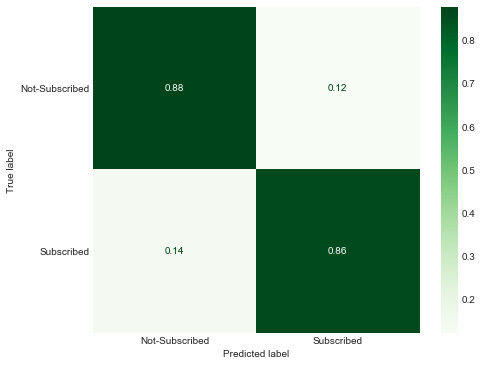

In [95]:
# Evaluate the model by using Recall/Precission:

getModelEvaluationMetrics(classifier=rf_grid_search,
                          model_name='Random Forest',
                          x_test=X_test,
                          y_test=y_test,
                          y_predicted=rf_y_pred,
                          plot_matrix=True,
                          figsize=(8,6)
                         )


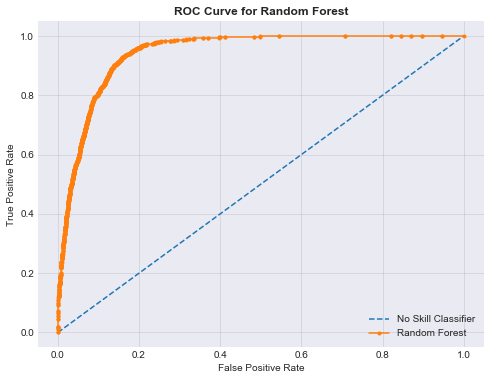

Random Forest - ROC AUC score: 0.9426


0.9426

In [97]:
# Evaluate the model by using ROC Curve:

createROCAnalysis(classifier=rf_grid_search,
                  model_name='Random Forest',
                  y_test=y_test,
                  pred_probs=rf_pred_probs,
                  plot_ROC_Curve=True,
                  figsize=(8,6)
                 )

 Therefore from the results above we can infer that the Random Forest classifier:

 

 - Was very good at predicting clients who are not going to subscribe (negative class)

 - Did not perform very well in the case of the positive class, as it classified correctly approximately 37% of the total clients who end up subscribing for the product

 - Still achieved a very good ROC -AUC score


<a id='feature_importance'></a>

##### Feature Importance

One good aspect of the Random Forest classifier, is that it's giving us the ability to observe which features were the most important when predicting the target variable. As presented in the sklearn documentation: *"The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**."*

In [99]:
# Find the feature importance based on Gini criterion

feature_importance = {}

best_estimator_fi = rf_grid_search.best_estimator_.feature_importances_



for feature, importance in zip(X_train.columns, best_estimator_fi):

    feature_importance[feature] = importance



importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})



importances = importances.sort_values(by='Gini Score', ascending=False)

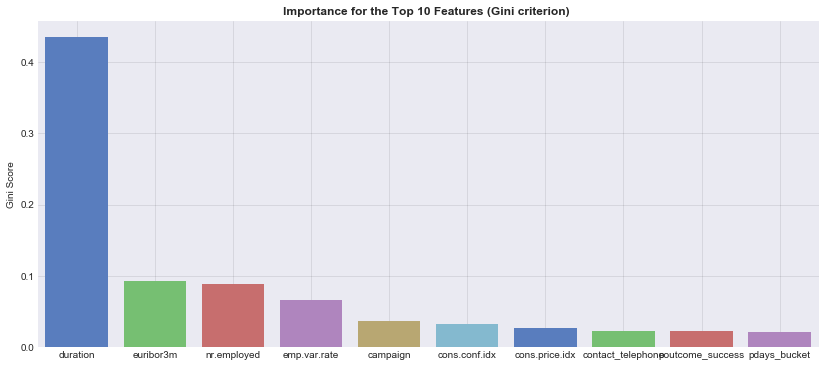

In [100]:
# Plot for feature importance

plt.figure(figsize=(14, 6))

sns.barplot(x=importances.index[0:10],

            y=importances['Gini Score'].iloc[0:10], palette='muted')

plt.title(f'Importance for the Top 10 Features (Gini criterion) ',

          fontweight='bold')

plt.grid(True, alpha=0.1, color='black')

plt.show()

Based on the plot above we can infer that:



- $duration$: Appears to be a very good predictor, but as a feature is has the problem that we only know it's value *after* the call is finished - therefore it's not a variable that we would like to use further in a prediction model



- $emp.var.rate$, $cons.price.idx$, $euribor3m$, $nr.employed$: The features from  the socioeconomic group of variables appears to  be good predictors for the target variable. That said, we saw in a previous section that these variables are highly correlated with each other - something that we want to avoid (especially for a Logistic Regression model, which is our next classifier). Therefore, we will continue our analysis only with ($euribor3m$),



Therefore, based on our findings from the EDA and features importance analysis presented above, we can see that some of the variables that appear to be strongest predictors for the target variable are the following: $age$, $pdays\_bucket$, $campaign$, $poutcome$, $previous$



In the final model, we are going to also include the following variables in our model: $job$, $marital$, $education$, $default$, $housing$, $loan$

In [101]:
# Pick only the 5 variables for the second model

pout_ls = [col for col in X_train.columns if col.startswith('poutcome')]

rel_features_ls = ['nr.employed', 'age', 'pdays_bucket', 'campaign', 'previous'] + pout_ls

In [102]:
cols_to_exclude = ['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'month_apr', 'month_aug',

                   'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',

                   'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'contact_cellular'

                   'contact_telephone']



cols_include = [x for x in X_train.columns if x not in cols_to_exclude]

In [107]:
X_train_us_df = pd.DataFrame(X_train_us,  columns=X_train.columns)

In [108]:
X_train_reduced = X_train_us_df[cols_include]

X_test_reduced = X_test[cols_include]

<a id='logistic_regression'></a>

## Logistic Regression

Logistic regression is one of the most used machine learning classification algorithms, especially when we are facing a problem where the output variable (target) is binary (e.g. yes/no, spam/not spame, etc). The algorithm contains the word logistic, because it makes use of the logistic function - also known as sigmoid function:

$$S(x)={\frac {1}{1+e^{-x}}}$$



The name also contains the word regression, something that shouldn't confuse us as Logistic Regression is being used only for classification problems. This happens likely due to the fact that the algorithm is an 'extension' of linear regression but for classification tasks (remember that regression problems try to predict continuous values and not classes). Similar to linear regression, the input values are combined linearly and then they become the input ($x$) to the sigmoid function presented above.This time the output is being "squeezed" to take a value between 0 and 1. In some sense, it's safe to say that this output it's a mapping between predicted values to probabilities.

Now remember that the term $x$ above will have a format similar to the linear regression, so we can re-write the signmoid function as below:

    $$S(x)={\frac {1}{1+e^{-(wx+b)}}}$$

    

The logistic regression algorithm is trying to optimize the values of $w$ and $b$, something that usually happens via maximizing the likelihood of the training data, but more details regarding this is out of the scope of this project.

Pros:

1. Works well when the number of variables is small (low dimensionality)

2. Does not require time intensive tuning of the hyperpatameters

3. It's an algorithm which is easy to understand and implement



Cons:

1. Assumes linear relationship between the independent and the dependent variables.

2. Most of the assumptions from Linear Regression also apply in this case

In [109]:
# Instantiate the Logistic Regression Model

log_reg = LogisticRegression()

We can set the parameter grid for tuning, similar to what we did for the random forest. The Logistic Regression algorithm is being tuned for the following parameters:

- __C__: It's the inverse of the regularization strength

- __class_weight__: Handles the imbalance issue of the dataset, as it assigns different weight for the classes

In [114]:
bal_w = ['balanced']



param_grid = {

    'solver': ['lbfgs', 'saga'],

    'C': np.arange(0.1, 10.1, 0.2),

    'penalty': ['l2'],

    'class_weight': bal_w

}

In [115]:
# Tune the model by finding the best hyperparameters

logreg_grid_search = GridSearchCV(estimator=log_reg,

                                  scoring=['recall'],

                                  refit='recall',

                                  param_grid=param_grid,

                                  cv=10,

                                  n_jobs=-1,

                                  verbose=10)

In [ ]:
# Fit the model and find the optimal parameters

logreg_grid_search.fit(X_train_reduced, y_train_us)

We can observe which were the best hyperparameters used for the Logistic Regression model:

In [117]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
logreg_pred_probs = logreg_grid_search.predict_proba(X_test_reduced)

In [119]:
# Assign the above probabilities to the corresponding class ('no', 'yes')

logreg_y_pred = logreg_grid_search.predict(X_test_reduced)

And finally we can evaluate the model's performance and visualize the results, similar to what we did for the Random Forests algorithm.

Classification results for Logistic Regression : 

The precision is: 26.95 %
The recall is: 67.04 %


array([[5500, 1765],
       [ 320,  651]], dtype=int64)

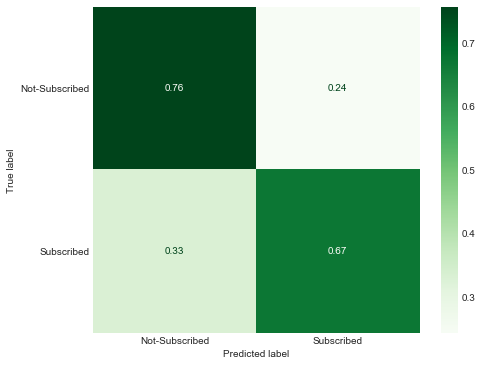

In [121]:
# Evaluate the model by using Recall/Precission:

getModelEvaluationMetrics(classifier=logreg_grid_search,

                          model_name='Logistic Regression',

                          x_test=X_test_reduced,

                          y_test=y_test,

                          y_predicted=logreg_y_pred,

                          plot_matrix=True,

                          figsize=(8,6))

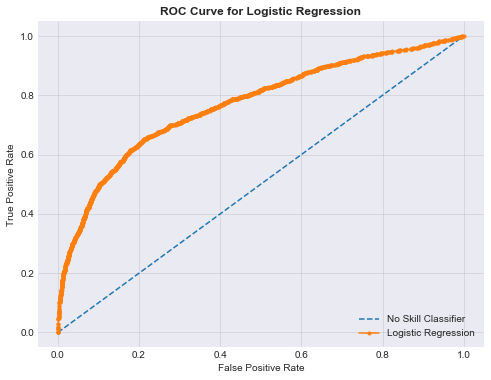

Logistic Regression - ROC AUC score: 0.7693


0.7693

In [122]:
# Evaluate the model by using ROC Curve:

createROCAnalysis(classifier=logreg_grid_search,

                  model_name='Logistic Regression',

                  y_test=y_test,

                  pred_probs=logreg_pred_probs,

                  plot_ROC_Curve=True,

                  figsize=(8,6))

Logistic Regression results:

 

- Overall, this classifier performed worse than the Random Forest, where we used all 20 predictor variables

- Performed better at capturing the minority class (i.e. clients who ended up subscribing)

- But at the same time it made more mistakes by classifying clients who did not subscribe as ‘subscribed’


<a id='model_comparison'></a>

## Part 5 - Model Comparison and Final Thoughts

At this final part of this project, we will focus on comparing the two classification algorithms output. We can summarize our observations as presented below:



1. The first model (Random Forest) performed better at predicting clients who will not subscribe for the product



2. The dataset is small in size and we can leverage the power of Random Forests (Model A), but we have to remove variables like ‘duration’, as they are unrealistic for a real-world scenario



3. Logistic Regression was better at capturing the cases where clients did subscribe for the product, but was more prompt at classifying client who did not intend to subscribe as ‘subscribed’



4. Logistic Regression contained only a subset of the variables from the feature space, and thus it's possible that we are losing important information by this limitation



From the above we can infer that, if a data scientist/analyst cares equally about predicting accurately both classes then he/she should go with the random forest algorithm.On the other hand, if our business purpose is to accurately identify as many ‘subscribed’ clients as possible, then we should pick the logistic regression model.




Some ideas for further research in future iterations of the project:

    

- Use imputation methods for the columns that have ‘unknown’ values, and observe if it affects the output



- Try dimensionality reduction techniques (e.g. for the socioeconomics features that were highly correlated)



- Test more complex types of classifiers (e.g. XGboost)